In [ ]:
#Kacper Klocek 
#Data Analytics project
#Analysis of US Political Voilence and it's correlaction to political ideology

In [22]:
#Dependencies : 
!pip install scikit-learn
!pip install seaborn matplotlib

import matplotlib
import seaborn
import sklearn
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np



In [41]:
#Data Cleaning
import pandas as pd
data = pd.read_csv('Dataset_files/prosecutionProject.csv')

#Removed the "Short narrative" column as it servered no use in data analysis
data_cleaned = data.drop(columns=['Short narrative'])


missing_values_summary = data_cleaned.isnull().sum()
columns_to_drop = missing_values_summary[missing_values_summary > (0.5 * len(data_cleaned))].index
#Dropped columns with over 50% missing data
data_cleaned = data_cleaned.drop(columns=columns_to_drop)

#Converted Data to datatime
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], errors='coerce')

#print(data_cleaned.head())

#Saved the cleaned data
data_cleaned.to_csv('Dataset_files/cleaned_dataset.csv', index=False)


In [42]:
#2. Data Integration

data_cleaned = pd.read_csv('Dataset_files/cleaned_dataset.csv')

#Extracted the month and year from the 'date' value
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], errors='coerce')
data_cleaned['Year'] = data_cleaned['Date'].dt.year
data_cleaned['Month'] = data_cleaned['Date'].dt.month

#Dropped duplicate rows
data_cleaned = data_cleaned.drop_duplicates()

#Saved integrated dataset 
data_cleaned.to_csv('Dataset_files/integrated_dataset.csv', index=False)


In [43]:
#3. Data Selection
data_integrated = pd.read_csv('Dataset_files/integrated_dataset.csv')

columns_to_keep = ['Date', 'Year', 'Month', 'Ideological affiliation', 'Group affiliation', 
                   'Location: state', 'Location: city', '# killed', '# injured', 'Charges']
data_selected = data_integrated[columns_to_keep]

#Filter rows with non-null "Ideological affiliation"
data_selected = data_selected[data_selected['Ideological affiliation'].notnull()]

#saved the dataset
data_selected.to_csv('Dataset_files/selected_dataset.csv', index=False)


In [44]:
#4. Data Transformation 
#Load the selected dataset
data_selected = pd.read_csv('Dataset_files/selected_dataset.csv')

#Clean numeric columns by removing commas and converting to float
#Replace non-numeric values with NaN
non_numeric_values = ['Unknown', 'Multiple']
data_selected['# killed'] = data_selected['# killed'].replace(',', '', regex=True).replace(non_numeric_values, np.nan)
data_selected['# injured'] = data_selected['# injured'].replace(',', '', regex=True).replace(non_numeric_values, np.nan)

#Convert to float and fill NaN values with 0 (or another suitable value)
data_selected['# killed'] = data_selected['# killed'].astype(float).fillna(0)
data_selected['# injured'] = data_selected['# injured'].astype(float).fillna(0)

#Encode "Ideological affiliation" into numeric values
label_encoder = LabelEncoder()
data_selected['Ideological affiliation'] = label_encoder.fit_transform(data_selected['Ideological affiliation'])

#Normalize numerical columns like "# killed" and "# injured"
scaler = MinMaxScaler()
data_selected[['# killed', '# injured']] = scaler.fit_transform(data_selected[['# killed', '# injured']])

#Saved the transformed dataset
data_selected.to_csv('Dataset_files/transformed_dataset.csv', index=False)


In [31]:
#5. Data Mining

from sklearn.cluster import KMeans

# Load the transformed dataset
data_transformed = pd.read_csv('Dataset_files/transformed_dataset.csv')

# Analyze the number of incidents per year
yearly_incidents = data_transformed.groupby('Year').size().reset_index(name='Incident Count')

total_incidents = yearly_incidents['Incident Count'].sum()
print(f"Total number of incidents: {total_incidents}")

# Save yearly incidents data
yearly_incidents.to_csv('Dataset_files/yearly_incidents.csv', index=False)
print(yearly_incidents)

# Perform clustering
X = data_transformed[['Year', '# killed', '# injured']]
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

# Add cluster labels to the dataset
data_transformed['Cluster'] = kmeans.labels_

# Save the dataset with cluster labels
data_transformed.to_csv('Dataset_files/clustered_dataset.csv', index=False)


Total number of incidents: 4362
    Year  Incident Count
0   1990              16
1   1991              14
2   1992               8
3   1993              56
4   1994              44
5   1995              57
6   1996             111
7   1997              90
8   1998              77
9   1999             124
10  2000              57
11  2001             197
12  2002             147
13  2003             154
14  2004             117
15  2005             129
16  2006              88
17  2007             105
18  2008              84
19  2009             173
20  2010             155
21  2011             144
22  2012             125
23  2013              94
24  2014             118
25  2015             147
26  2016             201
27  2017             180
28  2018             368
29  2019             493
30  2020             205
31  2021             112
32  2022             109
33  2023              53
34  2024              10


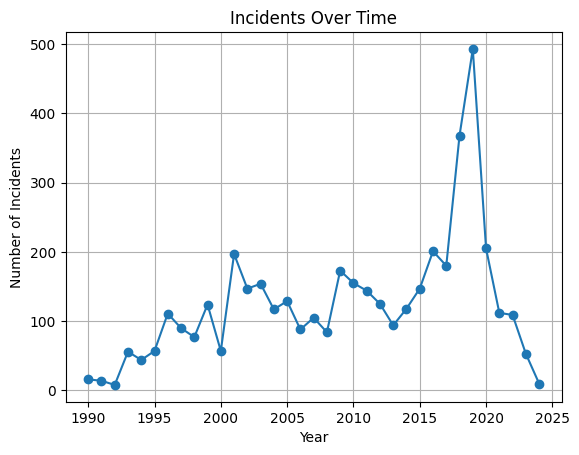

In [46]:
#6. Pattern Evaluation


# Plot incidents over time
plt.plot(yearly_incidents['Year'], yearly_incidents['Incident Count'], marker='o')
plt.title('Incidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()

# Filter numeric columns for correlation matrix
numeric_data = data_transformed.select_dtypes(include=['float64', 'int64'])




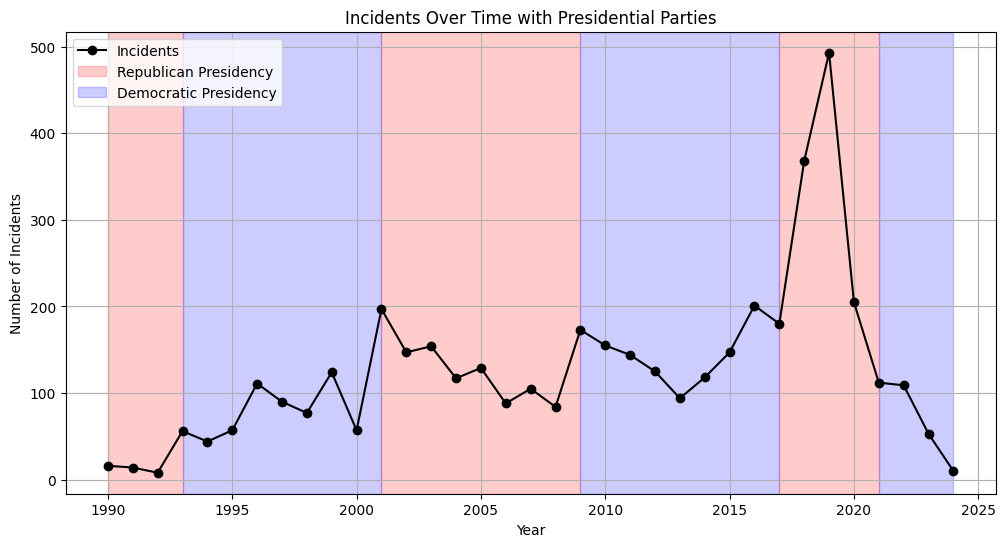

In [49]:
import matplotlib.pyplot as plt

presidential_terms = {
    'Republican': [(1990, 1993), (2001, 2009), (2017, 2021)],  #Reagan, Bush , W Bush , Trump
    'Democratic': [(1993, 2001), (2009, 2017), (2021, 2024)]   #Clinton ,Obama, Biden
}


plt.figure(figsize=(12, 6))
plt.plot(yearly_incidents['Year'], yearly_incidents['Incident Count'], color='black', marker='o', label='Incidents')

for term in presidential_terms['Republican']:
    plt.axvspan(term[0], term[1], color='red', alpha=0.2, label='Republican Presidency' if term == presidential_terms['Republican'][0] else "")
for term in presidential_terms['Democratic']:
    plt.axvspan(term[0], term[1], color='blue', alpha=0.2, label='Democratic Presidency' if term == presidential_terms['Democratic'][0] else "")


plt.title('Incidents Over Time with Presidential Parties')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(loc='upper left')
plt.grid(True)

plt.show()


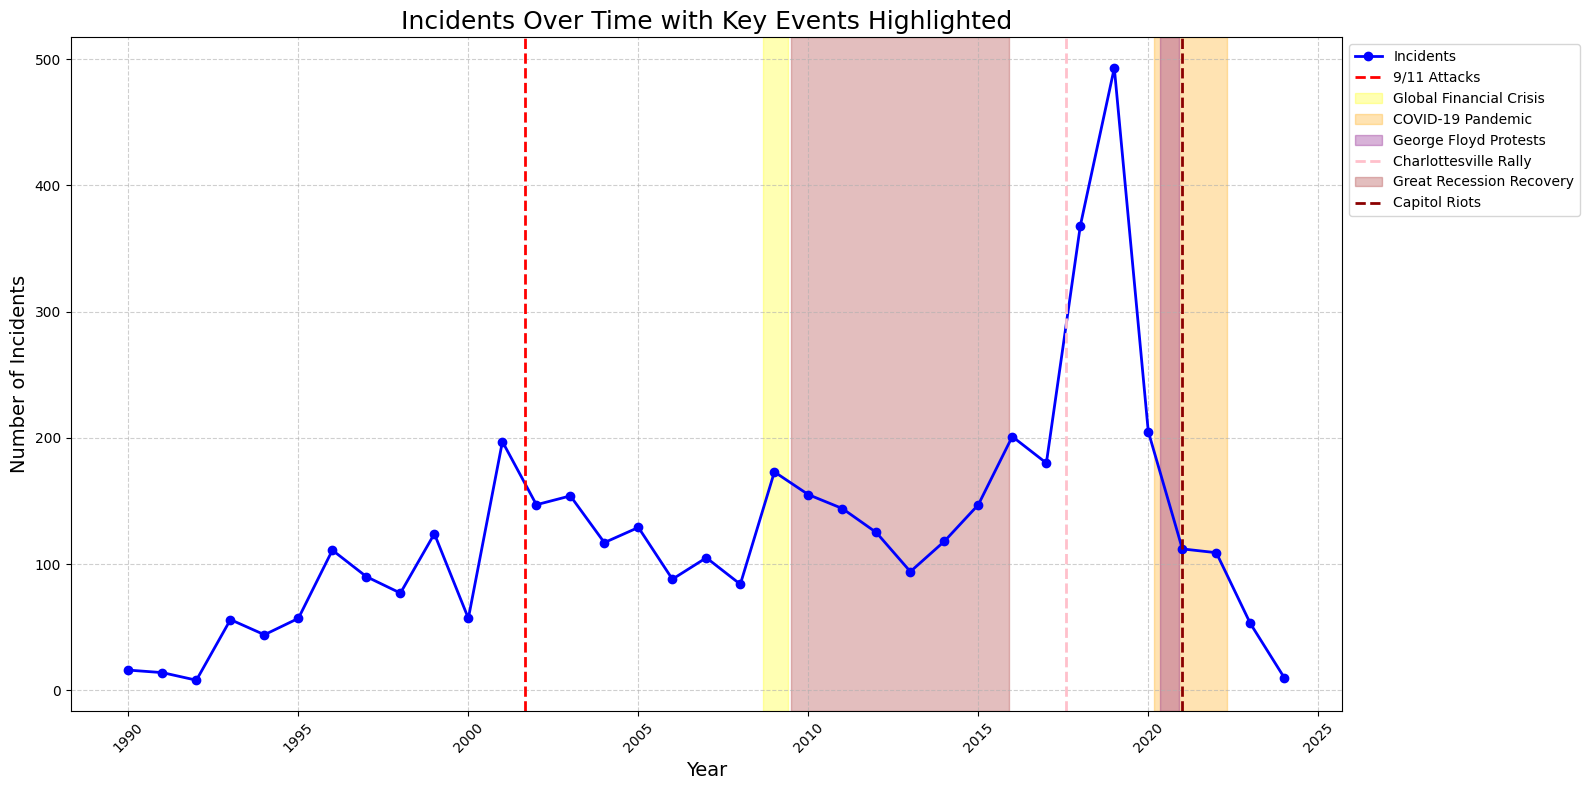

In [67]:

yearly_incidents = pd.read_csv('Dataset_files/yearly_incidents.csv')

plt.figure(figsize=(16, 8))

plt.plot(
    pd.to_datetime(yearly_incidents['Year'].astype(str)), 
    yearly_incidents['Incident Count'], 
    color='blue', 
    marker='o', 
    linestyle='-', 
    linewidth=2, 
    label='Incidents'
)

key_events = [
    {'label': '9/11 Attacks', 'start': '2001-09', 'end': '2001-09', 'color': 'red'},
    {'label': 'Global Financial Crisis', 'start': '2008-09', 'end': '2009-06', 'color': 'yellow'},
    {'label': 'COVID-19 Pandemic', 'start': '2020-03', 'end': '2022-05', 'color': 'orange'},
    {'label': 'George Floyd Protests', 'start': '2020-05', 'end': '2020-12', 'color': 'purple'},
    {'label': 'Charlottesville Rally', 'start': '2017-08', 'end': '2017-08', 'color': 'pink'},
    {'label': 'Great Recession Recovery', 'start': '2009-07', 'end': '2015-12', 'color': 'brown'},
    {'label': 'Capitol Riots', 'start': '2021-01', 'end': '2021-01', 'color': 'darkred'}
]

# Add shaded regions and vertical lines for events
for event in key_events:
    start_date = pd.to_datetime(event['start'])
    end_date = pd.to_datetime(event['end'])
    if start_date != end_date:  # For periods like COVID-19
        plt.axvspan(start_date, end_date, color=event['color'], alpha=0.3, label=event['label'])
    else:  # For one-time events like 9/11
        plt.axvline(start_date, color=event['color'], linestyle='--', linewidth=2, label=event['label'])

# Customize the x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))  # Show every 5 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Add labels, title, and legend
plt.title('Incidents Over Time with Key Events Highlighted', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.legend(loc='upper left', fontsize=10, bbox_to_anchor=(1, 1))  # Move legend outside the graph
plt.grid(True, linestyle='--', alpha=0.6)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()




In [56]:
# Load the transformed dataset
data_transformed = pd.read_csv('Dataset_files/transformed_dataset.csv')

# Filter incidents from 2019
data_2019 = data_transformed[data_transformed['Year'] == 2019]

# Analyze the types of incidents in 2019
incident_types = data_2019['Ideological affiliation'].value_counts()

# Display summary
print(f"Total Incidents in 2019: {len(data_2019)}")
print(incident_types)




Total Incidents in 2019: 493
Ideological affiliation
9     274
0      62
11     41
12     31
5      23
8      21
6      10
2       9
7       9
10      7
1       6
Name: count, dtype: int64


In [38]:
#Next I want to evaluate the correlation between more right leaning and left leaning political ideologies.

#I separeted the ideologies from 1-10. 
#1 being far right leaning and 10 being far left leaning.


#Identifying all the political adfil
data_cleaned = pd.read_csv('Dataset_files/cleaned_dataset.csv')
unique_affiliations = data_cleaned['Ideological affiliation'].unique()
print(unique_affiliations)


['Rightist: identity-focused' 'Salafi/Jihadist/Islamist'
 'Leftist: government-focused' 'Rightist: abortion-focused'
 'Rightist: government-focused' 'Nationalist-separatist' 'Other' 'Unclear'
 'Leftist: eco-animal focused' 'Leftist: identity-focused'
 'Rightist: unspecified' 'No affiliation/not a factor'
 'Leftist: unspecified']


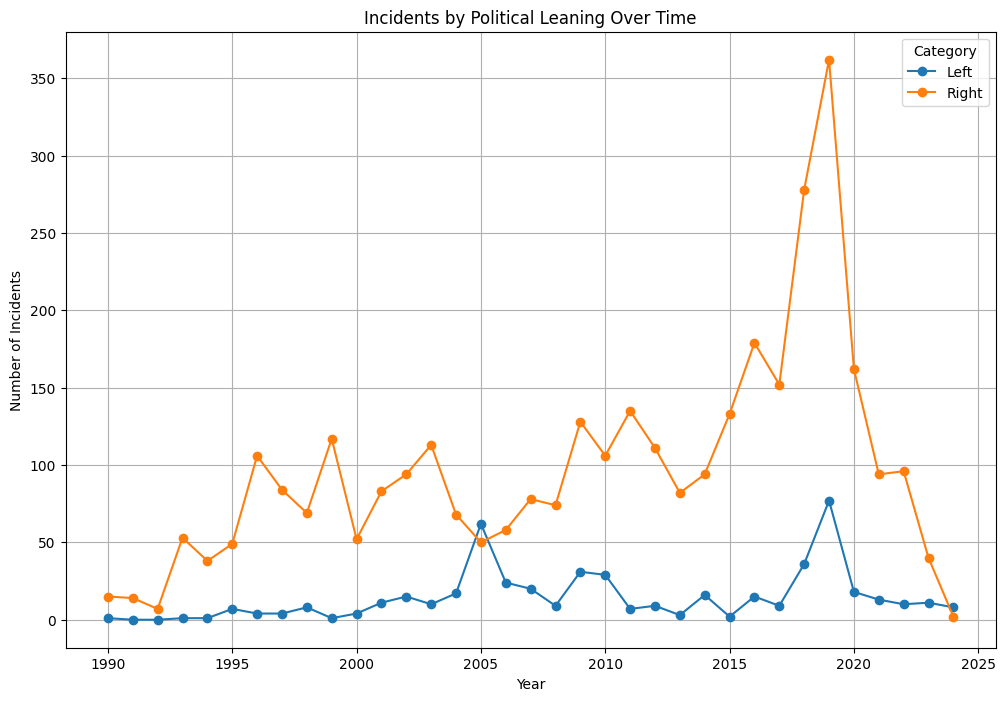

In [40]:
data_cleaned = pd.read_csv('Dataset_files/cleaned_dataset.csv')
#The value of 0 has been given to political ideologies which don't clearly map onto the right-left politcal spectrum
ideology_mapping = {
    'Rightist: identity-focused': 1,
    'Salafi/Jihadist/Islamist': 0,
    'Leftist: government-focused': 8,
    'Rightist: abortion-focused': 2,
    'Rightist: government-focused': 2,
    'Nationalist-separatist': 0,
    'Other': 0, 
    'Unclear': None,
    'Leftist: eco-animal focused': 9,
    'Leftist: identity-focused': 9,
    'Rightist: unspecified': 3,
    'No affiliation/not a factor': None,
    'Leftist: unspecified': 8,
}

data_cleaned['Ideological Score'] = data_cleaned['Ideological affiliation'].map(ideology_mapping)
data_cleaned = data_cleaned.dropna(subset=['Ideological Score'])
data_cleaned['Category'] = data_cleaned['Ideological Score'].apply(
    lambda x: 'Right' if x <= 5 else ('Left' if x >= 6 else 'Other')
)

# Group incidents by Year and Category
data_cleaned['Year'] = pd.to_datetime(data_cleaned['Date'], errors='coerce').dt.year
ideology_trends = data_cleaned.groupby(['Year', 'Category']).size().unstack(fill_value=0)

# Plot trends over time
ideology_trends.plot(kind='line', figsize=(12, 8), marker='o')
plt.title('Incidents by Political Leaning Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(title='Category')
plt.grid(True)
plt.show()


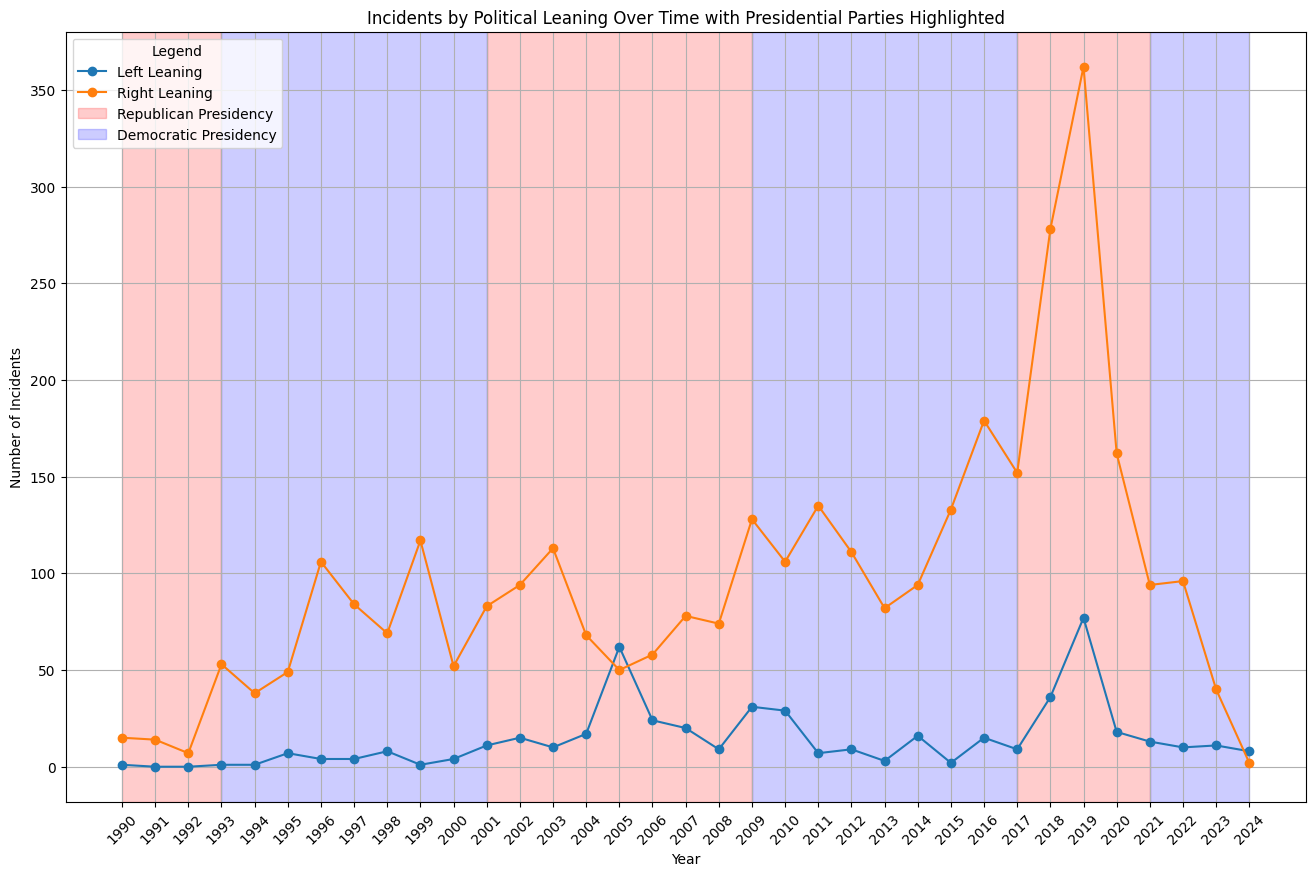

In [62]:
import matplotlib.pyplot as plt


plt.figure(figsize=(16, 10))

for category in ideology_trends.columns:
    plt.plot(
        ideology_trends.index,
        ideology_trends[category],
        marker='o',
        label=f'{category} Leaning'
    )

for term in presidential_terms['Republican']:
    plt.axvspan(term[0], term[1], color='red', alpha=0.2, label='Republican Presidency' if term == presidential_terms['Republican'][0] else "")
for term in presidential_terms['Democratic']:
    plt.axvspan(term[0], term[1], color='blue', alpha=0.2, label='Democratic Presidency' if term == presidential_terms['Democratic'][0] else "")

# Set x-ticks for every year
plt.xticks(range(ideology_trends.index.min(), ideology_trends.index.max() + 1, 1), rotation=45)

# Graph customization
plt.title('Incidents by Political Leaning Over Time with Presidential Parties Highlighted')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(loc='upper left', title='Legend')
plt.grid(True)

# Show the graph
plt.show()

